# SVM

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
from datetime import datetime
import calendar

warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns', 500)


In [3]:
# load fraudulent profile 
badguy = pd.read_excel('/Users/AngelicaGoglio/Documents/GitHub/SVM.xlsx')
pd.set_option('display.max_rows',5000)
print(badguy)

      Unnamed: 0    smart meter  power         day   time       FD5
0              0  LGZ0031833648  0.210  2020-06-02  00:00  0.171331
1              1  LGZ0031833648  0.113  2020-06-02  01:00  0.092193
2              2  LGZ0031833648  0.119  2020-06-02  02:00  0.097088
3              3  LGZ0031833648  0.114  2020-06-02  03:00  0.093008
4              4  LGZ0031833648  0.114  2020-06-02  04:00  0.093008
5              5  LGZ0031833648  0.122  2020-06-02  05:00  0.099535
6              6  LGZ0031833648  0.121  2020-06-02  06:00  0.098720
7              7  LGZ0031833648  0.133  2020-06-02  07:00  0.108510
8              8  LGZ0031833648  0.208  2020-06-02  08:00  0.169700
9              9  LGZ0031833648  0.178  2020-06-02  09:00  0.145224
10            10  LGZ0031833648  0.141  2020-06-02  10:00  0.115037
11            11  LGZ0031833648  0.454  2020-06-02  11:00  0.370402
12            12  LGZ0031833648  0.165  2020-06-02  12:00  0.134618
13            13  LGZ0031833648  0.232  2020-06-

In [4]:
badguy.dtypes

Unnamed: 0       int64
smart meter     object
power          float64
day             object
time            object
FD5            float64
dtype: object

In [5]:
badguy = badguy.rename(columns={"power": "power_real"})
badguy = badguy.rename(columns={"FD5": "power_fraud"})
badguy['time'] = pd.to_datetime(badguy['time'])
badguy.head()


,Unnamed: 0,smart meter,power_real,day,time,power_fraud
0,0,LGZ0031833648,0.210,2020-06-02,2021-05-21 00:00:00,0.171331
1,1,LGZ0031833648,0.113,2020-06-02,2021-05-21 01:00:00,0.092193
2,2,LGZ0031833648,0.119,2020-06-02,2021-05-21 02:00:00,0.097088
3,3,LGZ0031833648,0.114,2020-06-02,2021-05-21 03:00:00,0.093008
4,4,LGZ0031833648,0.114,2020-06-02,2021-05-21 04:00:00,0.093008


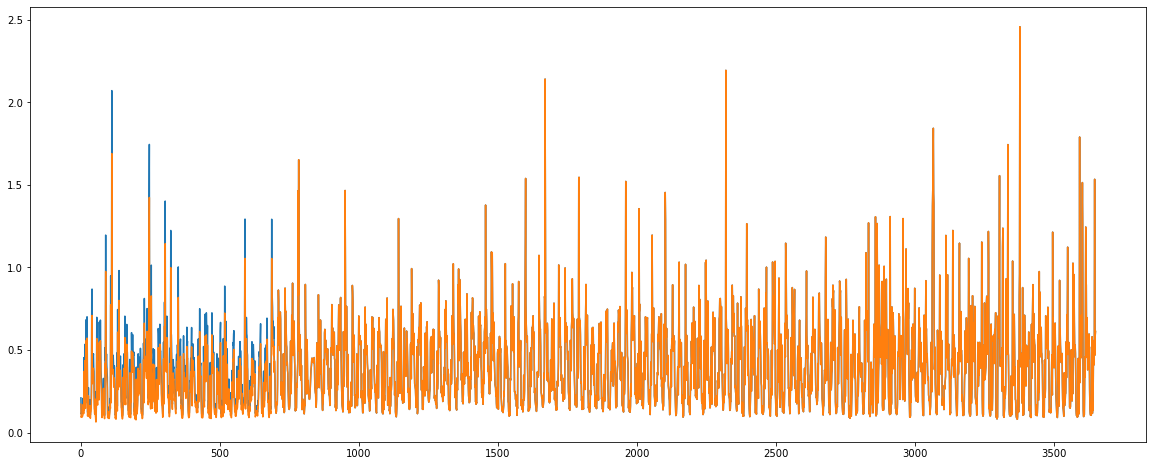

In [10]:
badguy['power_real'][0:3649].plot(figsize = (20,8))
badguy['power_fraud'][0:3649].plot(figsize = (20,8))
plt.show()
 

In [6]:
df_bg=badguy.copy()

In [7]:
list_days=df_bg['day'].unique()
list_days

array(['2020-06-02', '2020-06-03', '2020-06-04', '2020-06-05',
       '2020-06-06', '2020-06-07', '2020-06-08', '2020-06-09',
       '2020-06-10', '2020-06-11', '2020-06-12', '2020-06-13',
       '2020-06-14', '2020-06-15', '2020-06-16', '2020-06-17',
       '2020-06-18', '2020-06-19', '2020-06-20', '2020-06-21',
       '2020-06-22', '2020-06-23', '2020-06-24', '2020-06-25',
       '2020-06-26', '2020-06-27', '2020-06-28', '2020-06-29',
       '2020-06-30', '2020-07-01', '2020-07-02', '2020-07-03',
       '2020-07-04', '2020-07-05', '2020-07-06', '2020-07-07',
       '2020-07-08', '2020-07-09', '2020-07-10', '2020-07-11',
       '2020-07-12', '2020-07-13', '2020-07-14', '2020-07-15',
       '2020-07-16', '2020-07-17', '2020-07-18', '2020-07-19',
       '2020-07-20', '2020-07-21', '2020-07-22', '2020-07-23',
       '2020-07-24', '2020-07-25', '2020-07-26', '2020-07-27',
       '2020-07-28', '2020-07-29', '2020-07-30', '2020-07-31',
       '2020-08-01', '2020-08-02', '2020-08-03', '2020-

In [8]:
#How many different days are there?
n=df_bg['day'].nunique()
n

152

In [9]:
i=0
for day in list_days:
    print (i, day)
    i = i+ 1

0 2020-06-02
1 2020-06-03
2 2020-06-04
3 2020-06-05
4 2020-06-06
5 2020-06-07
6 2020-06-08
7 2020-06-09
8 2020-06-10
9 2020-06-11
10 2020-06-12
11 2020-06-13
12 2020-06-14
13 2020-06-15
14 2020-06-16
15 2020-06-17
16 2020-06-18
17 2020-06-19
18 2020-06-20
19 2020-06-21
20 2020-06-22
21 2020-06-23
22 2020-06-24
23 2020-06-25
24 2020-06-26
25 2020-06-27
26 2020-06-28
27 2020-06-29
28 2020-06-30
29 2020-07-01
30 2020-07-02
31 2020-07-03
32 2020-07-04
33 2020-07-05
34 2020-07-06
35 2020-07-07
36 2020-07-08
37 2020-07-09
38 2020-07-10
39 2020-07-11
40 2020-07-12
41 2020-07-13
42 2020-07-14
43 2020-07-15
44 2020-07-16
45 2020-07-17
46 2020-07-18
47 2020-07-19
48 2020-07-20
49 2020-07-21
50 2020-07-22
51 2020-07-23
52 2020-07-24
53 2020-07-25
54 2020-07-26
55 2020-07-27
56 2020-07-28
57 2020-07-29
58 2020-07-30
59 2020-07-31
60 2020-08-01
61 2020-08-02
62 2020-08-03
63 2020-08-04
64 2020-08-05
65 2020-08-06
66 2020-08-07
67 2020-08-08
68 2020-08-09
69 2020-08-10
70 2020-08-11
71 2020-08-12
72

# Creation of new dataset with feaures and lables

In [10]:
#FUNCTION DECIDE IF IT IS A FRAUD

results =[]
for i, row in df_bg.iterrows():
  
    if row['time'].hour == 0:
        frode = True        #set everyday as fraudulent
        
    if row['power_real'] == row['power_fraud']:
        frode = False       #if not fraudulent then set it as not fraudulent 
       
    if row['time'].hour == 23:
        
        result = frode    #reset
        results.append(result)

print(type(results))

print (results)

<class 'list'>
[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False

In [11]:
#FIND PEAKS FEATURE
def find_peaks(day, nb_samples):
    daily_max_function = [] 
    for i in range(2,22):    #Look at the second day and the second last one so I can compare i-1, i, i+1
        if day[i]<0.1:
            continue
        else:
            if day[i]>day[i-1] and day[i]>day[i+1]:
                daily_max_function.append(day[i])
    daily_max_function.sort(reverse = True)
    final_average = sum(daily_max_function[0:nb_samples])/nb_samples
    return(final_average)

In [12]:
#WEEK OR WEEKEND FEATURE
import datetime 
import calendar 

def findDay(day): 
    date = datetime.datetime.strptime(day,"YYYY-mm-dd").weekday()
    return (calendar.day_name[date])

def TypeDay(day):
    if findDay(day) == 'Saturday' or findDay(day) == 'Sunday' :
        day_type = 1
    else:
        day_type = 0
    return(day_type)



In [13]:
#CUTS FUNCTION
def cuts_1b(df,mean):
    power = df.iloc[0]['power_fraud']
    above_0 = (power>mean)
    prev_above = above_0
    cuts = 0
    i=0
    for index, row in df.iterrows():
        if i!=0:
            power = row['power_fraud']
            above = power>mean
            if above!=prev_above:
                cuts += 1
                above = (power>mean)
            prev_above=above
            i+=1
        else:
            i+=1
    if above_0!=above:
        cuts += 1    
    return (cuts)

In [14]:
#SLOPES FUNCTION
def deep_slopes_1b(df, mean):
    power = df.iloc[0]['power_fraud']
    previous_p = power
    inc = 0
    dec = 0
    power_0 = power
    for index, row in df.iterrows():
        #print(power, inc, dec)
        power = row['power_fraud']
        if power>(previous_p+0.5*mean):
            inc += 1
        elif power<(previous_p-0.5*mean):
            dec += 1
        previous_p = power
    if power_0>(previous_p+0.5*mean):
        inc += 1
    elif power_0>(previous_p-0.5*mean):
        dec += 1
    return (inc,dec)

In [15]:
#FEATURES SELECTION
df = pd.DataFrame(columns=['date','mean','median','std','mean_p1','mean_p2','mean_p3','n_cuts','inc','dec',
                            'peaks_avg'])

for day in list_days:
    
    daily_ref = df_bg[df_bg['day'] == day]
    
    power = daily_ref['power_fraud'].mean()
    
    mean = daily_ref['power_fraud'].mean()
    
    std = daily_ref['power_fraud'].std()

    median = daily_ref['power_fraud'].median()
    
    peak = find_peaks(list (daily_ref['power_fraud']), 3)
    
    daily_p1 = daily_ref[daily_ref['time'].dt.hour < 8]
    mean_p1 = daily_p1['power_fraud'].mean()
    
    daily_p2 = daily_ref[(daily_ref['time'].dt.hour > 8) & (daily_ref['time'].dt.hour < 16)]
    mean_p2 = daily_p2['power_fraud'].mean()
    
    daily_p3 = daily_ref[(daily_ref['time'].dt.hour > 16) & (daily_ref['time'].dt.hour < 24)]
    mean_p3 = daily_p3['power_fraud'].mean()
    
    n_cuts = cuts_1b(daily_ref,mean)
    
    inc, dec = deep_slopes_1b(daily_ref,mean)
    
    #day_type = TypeDay(day)
    
    df = df.append({'date':day,'mean':power,'std':std, 'median':median, 'mean_p1':mean_p1,'mean_p2':mean_p2, 'mean_p3':mean_p3,'n_cuts':n_cuts,'inc': inc,'dec':dec,'peaks_avg':peak },
                   ignore_index=True)
    
df_features = df

print(df_features)    

           date      mean    median       std   mean_p1   mean_p2   mean_p3  \
0    2020-06-02  0.228952  0.159093  0.151301  0.106674  0.238582  0.379027   
1    2020-06-03  0.249620  0.162357  0.172700  0.141960  0.222265  0.346859   
2    2020-06-04  0.274980  0.229666  0.158160  0.119014  0.293594  0.418305   
3    2020-06-05  0.255875  0.251694  0.193129  0.165722  0.179374  0.435788   
4    2020-06-06  0.327195  0.227218  0.352453  0.097292  0.534274  0.342313   
5    2020-06-07  0.308023  0.319003  0.187438  0.162969  0.348724  0.394179   
6    2020-06-08  0.263014  0.242312  0.141719  0.123909  0.319935  0.365624   
7    2020-06-09  0.264646  0.261484  0.145319  0.150119  0.223197  0.393013   
8    2020-06-10  0.223615  0.199887  0.120315  0.125745  0.226810  0.340798   
9    2020-06-11  0.313802  0.364283  0.171755  0.111467  0.413876  0.417839   
10   2020-06-12  0.349972  0.207229  0.318597  0.469632  0.294177  0.316206   
11   2020-06-13  0.313734  0.312476  0.135125  0.213

In [16]:
df_features['Fraud'] = results
print(df_features)

           date      mean    median       std   mean_p1   mean_p2   mean_p3  \
0    2020-06-02  0.228952  0.159093  0.151301  0.106674  0.238582  0.379027   
1    2020-06-03  0.249620  0.162357  0.172700  0.141960  0.222265  0.346859   
2    2020-06-04  0.274980  0.229666  0.158160  0.119014  0.293594  0.418305   
3    2020-06-05  0.255875  0.251694  0.193129  0.165722  0.179374  0.435788   
4    2020-06-06  0.327195  0.227218  0.352453  0.097292  0.534274  0.342313   
5    2020-06-07  0.308023  0.319003  0.187438  0.162969  0.348724  0.394179   
6    2020-06-08  0.263014  0.242312  0.141719  0.123909  0.319935  0.365624   
7    2020-06-09  0.264646  0.261484  0.145319  0.150119  0.223197  0.393013   
8    2020-06-10  0.223615  0.199887  0.120315  0.125745  0.226810  0.340798   
9    2020-06-11  0.313802  0.364283  0.171755  0.111467  0.413876  0.417839   
10   2020-06-12  0.349972  0.207229  0.318597  0.469632  0.294177  0.316206   
11   2020-06-13  0.313734  0.312476  0.135125  0.213

In [17]:
#df_features.iloc[:,8].values

# Applying SVM

In [26]:
# Splitting dataset
from sklearn.model_selection import train_test_split
training_set, test_set = train_test_split(df_features, test_size = 0.4, random_state = 1)

In [27]:
# Classifying the predictors
X_train = training_set.iloc[:,1:11].values
Y_train = training_set.iloc[:,11].values
X_test = test_set.iloc[:,1:11].values
Y_test = test_set.iloc[:,11].values
#print(X_test)

In [28]:
#Initializing SVM
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state = 1)
classifier.fit(X_train,Y_train)

SVC(random_state=1)

In [29]:
#Predicting classes for test
Y_pred = classifier.predict(X_test)
test_set["Predictions"] = Y_pred
print(test_set["Predictions"])

59     False
33     False
69     False
127    False
31     False
107    False
97     False
14     False
53     False
44     False
146    False
138    False
78     False
102    False
5      False
85     False
16     False
100    False
89     False
95     False
91     False
124    False
92     False
99     False
93     False
40     False
29     False
42     False
54     False
122    False
35     False
19     False
113    False
103    False
77     False
145    False
58     False
121    False
56     False
28     False
51     False
109    False
66     False
17     False
119    False
126    False
132    False
73     False
18     False
48     False
4      False
45     False
75     False
39     False
36     False
118    False
150    False
108    False
12     False
147    False
84     False
Name: Predictions, dtype: bool


In [30]:
#df_features['Predictions'] = Y_pred
#print(df_features)

#print(test_set["Predictions"])

In [31]:
#Accurancy of the prediction

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test,Y_pred)
accuracy = float(cm.diagonal().sum())/len(Y_test)
print("\nAccuracy Of SVM For The Given Dataset : ", accuracy)


Accuracy Of SVM For The Given Dataset :  0.8524590163934426


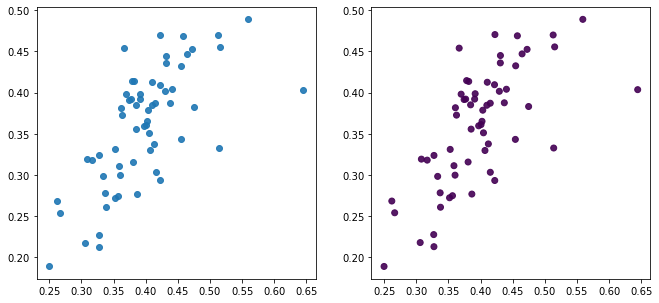

In [32]:
#Plotting 1
f, axes = plt.subplots(1, 2, figsize=(11,5))
axes[0].scatter(X_test[:,0], X_test[:,1], alpha=.9)
axes[1].scatter(X_test[:,0], X_test[:,1], c=Y_pred, alpha=.9)
#axes[1].scatter(fcm_centers[:,0], fcm_centers[:,1], marker="+", s=500, c='b', label = 'group 1')

In [37]:
#Plotting 2

from sklearn import svm
h = .02  # step size in the mesh
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
#svc = svm.SVC(kernel='linear', C=C).fit(X, y)
#rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y) #= classifier
#poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
#lin_svc = svm.LinearSVC(C=C).fit(X, y)

# create a mesh to plot in
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with RBF kernel']


for i, clf in enumerate((classifier)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

TypeError: 'SVC' object is not iterable

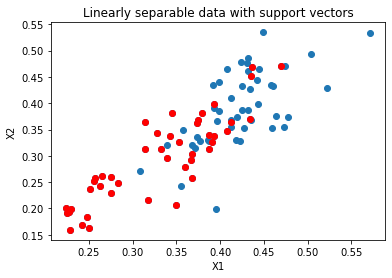

In [41]:
#Plotting 3

support_vector_indices = classifier.support_

# Get support vectors themselves
support_vectors = classifier.support_vectors_

# Visualize support vectors
plt.scatter(X_train[:,0], X_train[:,1])
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='red')
plt.title('Linearly separable data with support vectors')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

